In [1]:
#https://analyticsindiamag.com/brain-tumor-prediction-through-mri-images-using-cnn-in-keras/
#Downloading Dataset From Kaggle
!pip install kaggle

In [8]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Saving kaggle.json to kaggle (1).json
 79% 12.0M/15.1M [00:00<00:00, 19.8MB/s]
100% 15.1M/15.1M [00:00<00:00, 34.1MB/s]


In [10]:
#unzip the file using the below code
from zipfile import ZipFile
file_name ="/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [13]:
!pip install tqdm

In [19]:
#we will read the images and store it in a separate list. Use the below code to the same.
import os
import tqdm
import cv2

os.chdir('/content/yes')
X = []
y = []
for i in tqdm.tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(28,28))
      X.append(img)
      y.append((i[0:1]))

os.chdir('/content/no')
for i in tqdm.tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(28,28))
      X.append(img)

for i in range(1,99):
    y.append('N')


#We have stored all the images in X and all the corresponding labels into y.

100%|██████████| 98/98 [00:00<00:00, 511.20it/s]


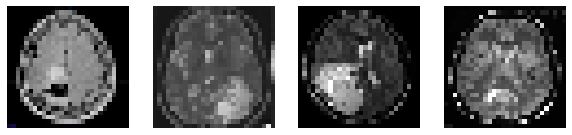

In [20]:
#Let us see some of the images that we just read. Use the below code to the same. 
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

#The images are distorted because we have resized them into 28X28 pixels. We will not split the data into training and testing data. Use the below code to do the same. 


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)


Shape of an image in X_train:  (28, 28, 3)
Shape of an image in X_test:  (28, 28, 3)


In [23]:
import tensorflow as tf

In [36]:
import keras
import keras.utils
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

y_train = np.array(y_train)
X_train = np.array(X_train)

y_test = np.array(y_test)
X_test = np.array(X_test)


In [38]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (169, 28, 28, 3)
X_test Shape:  (84, 28, 28, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization

m1= Sequential()
m1.add(BatchNormalization(input_shape=(28,28,3)))
m1.add(Convolution2D(32,(3,3), activation='relu', input_shape=(28,28,3)))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Dropout(0.25))
m1.add(Flatten()) 
m1.add(Dense(units=128,activation = 'relu'))
m1.add(Dense(units = 64, activation = 'relu'))
m1.add(Dense(units = 32, activation = 'relu'))
m1.add(Dense(units = 2, activation = 'softmax'))


In [48]:
m1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [49]:
history = m1.fit(X_train,y_train,
                    epochs=50, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)




Epoch 1/50
6/6 [==============================] - 0s 32ms/step - loss: 0.6803 - accuracy: 0.5621 - val_loss: 0.9741 - val_accuracy: 0.6071
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.6347 - accuracy: 0.6154 - val_loss: 1.5824 - val_accuracy: 0.6071
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 0.6113 - accuracy: 0.6391 - val_loss: 1.1264 - val_accuracy: 0.6071
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 0.5930 - accuracy: 0.7101 - val_loss: 2.3683 - val_accuracy: 0.6071
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 0.6037 - accuracy: 0.7278 - val_loss: 1.0321 - val_accuracy: 0.6071
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.5239 - accuracy: 0.7515 - val_loss: 1.0263 - val_accuracy: 0.6071
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 0.4866 - accuracy: 0.7692 - val_loss: 1.2749 - val_accuracy: 0.6071
Epoch 8/50
6/6 [=================

In [50]:
m1.evaluate(X_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.7206 - accuracy: 0.8690


[0.720630943775177, 0.8690476417541504]

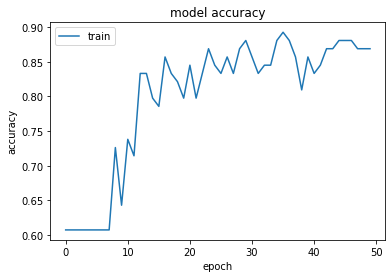

In [51]:
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

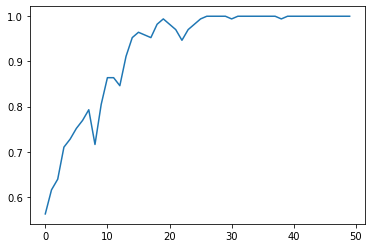

In [52]:
plt.plot(history.history['accuracy'])

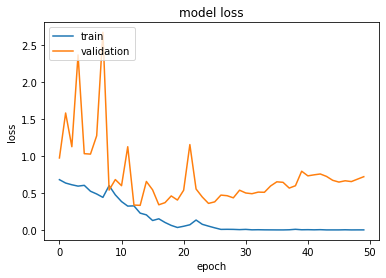

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


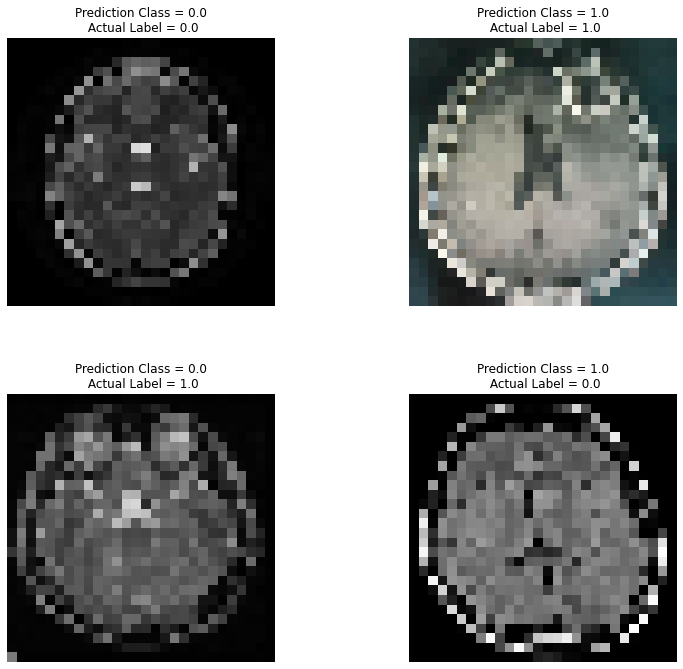

In [54]:
y_predicted=m1.predict_classes(X_test)
y_actual = np.argmax(y_test, axis=1)
L=2
W=2
fig,axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
  axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.92      0.86      0.89        51

    accuracy                           0.87        84
   macro avg       0.86      0.87      0.86        84
weighted avg       0.87      0.87      0.87        84

